In [1]:
import torch
import pandas as pd
import astropy as ap
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# from astropy.io import fits
import pdb
from scipy.ndimage.filters import maximum_filter1d
import glob
import fitsio as fits
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.distributions import Bernoulli, Binomial, Normal, Uniform
from torch.nn.utils import clip_grad_norm_
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from torch.distributions.normal import Normal
from tqdm import tqdm
import math

In [2]:
L = 5

In [3]:
T = 0.5

In [4]:
math.pi

3.141592653589793

In [5]:
x = torch.arange(0, L, 0.1)

In [6]:
x

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
        2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
        3.6000, 3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000,
        4.5000, 4.6000, 4.7000, 4.8000, 4.9000])

In [7]:
y = torch.sin(2*math.pi*x/T)

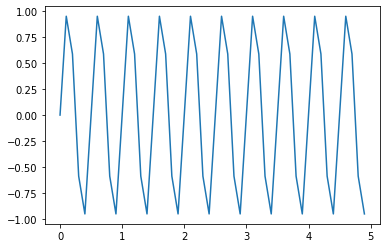

In [8]:
sns.lineplot(x=x.numpy(), y=y.numpy())

In [9]:
def make_sin():
    T = Normal(loc=L/2, scale=L/2).sample()
    y = torch.sin(2*math.pi*x/T)
    p = Uniform(0.3, 0.7)
    measurements = Binomial(probs=p.sample()).sample(x.size())
    y_out = y * measurements
    y_out = torch.stack((x, y_out))
    return y_out

In [10]:
yy = make_sin()

In [11]:
yy.shape

torch.Size([2, 50])

In [12]:
# sns.lineplot(x=x.numpy(), y=make_sin().numpy())

In [13]:
# sns.scatterplot(x=x.numpy(), y=make_sin().numpy())

### Build dataset

In [14]:
def make_set(n=200):
    samples = []
    for _ in range(n):
        samples.append(make_sin())
    return samples

In [15]:
samples = make_set()

In [16]:
test=samples[8]

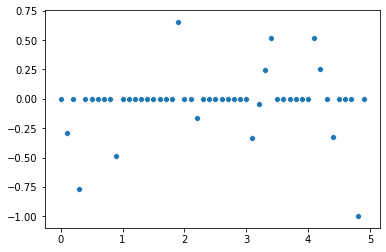

In [17]:
sns.scatterplot(x=test[0].numpy(), y=test[1].numpy())

### Output

In [18]:
outp = torch.stack(samples)

In [19]:
outp.shape

torch.Size([200, 2, 50])

In [20]:
train = outp[:180]
cv = outp[180:]

In [21]:
train.shape, cv.shape

(torch.Size([180, 2, 50]), torch.Size([20, 2, 50]))

In [22]:
from torch.utils.data import DataLoader
from utils import collate_ts, batchify
from loading import ToyDataset

In [23]:
train_set = ToyDataset(train)
cv_set = ToyDataset(cv)

In [24]:
train_loader = DataLoader(train_set, batch_size=10, collate_fn=collate_ts)
cv_loader = DataLoader(cv_set, batch_size=10, collate_fn=collate_ts)

In [25]:
torch.save(train_loader, 'toy_train.pt')
torch.save(cv_loader, 'cv_train.pt')

### Checks

In [26]:
l = torch.load('toy_train.pt')

In [27]:
d = next(iter(l))

In [29]:
d['observed_data'].shape

torch.Size([10, 49, 1])